# 로지스틱 회귀 `Logistic Regression`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
fish_df = pd.read_csv('./fish_data.csv')
fish_df.head(), pd.unique(fish_df['Species'])
# 타겟은 Species. 

(  Species  Weight  Length  Diagonal   Height   Width
 0   Bream   242.0    25.4      30.0  11.5200  4.0200
 1   Bream   290.0    26.3      31.2  12.4800  4.3056
 2   Bream   340.0    26.5      31.1  12.3778  4.6961
 3   Bream   363.0    29.0      33.5  12.7300  4.4555
 4   Bream   430.0    29.0      34.0  12.4440  5.1340,
 array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
       dtype=object))

In [3]:
# 데이터 받은 다음, 학습데이터 - 테스트데이터 분리

X = fish_df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
# 얘는 df
# 데이터가 너무 많을 때는 numpy로 바꿔서 씀. 그래야 용량이 좀 가벼워짐.
y = fish_df['Species'] # 얘는 시리즈

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # train: 119, test: 40

In [4]:
# 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train) # X_train을 기준으로 
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3) # 인스턴스 생성, 주변 참고 데이터 3개로 결정
kn.fit(X_train, y_train)
kn.score(X_train, y_train), kn.score(X_test, y_test)


(0.8907563025210085, 0.85)

In [6]:
# 분류해야 하는 항목.(abc 순서))
print(kn.classes_) 

# 테스트셋에서 앞 5개 데이터를 예측해라
print(kn.predict(X_test[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [7]:
# 예측 확률
kn.predict_proba(X_test[:5])

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ],
       [0.        , 0.        , 0.66666667, 0.        , 0.33333333,
        0.        , 0.        ]])

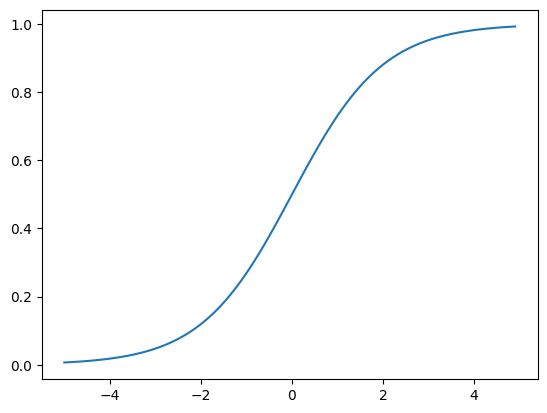

In [8]:
# Logistic Regression: 분류(Classify)하는 회귀
# 시그모이드 함수 사용

z =np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)


index = (y_train == 'Bream') | (y_train == 'Smelt')

X_bream_smelt_train = X_train_s[index]
y_bream_smelt_train = y_train[index]


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# 로지스틱회귀 학습 -> 방정식 만들기 -> 두개중 하나로 분류해야 함 -> abc순 뒤에걸로 분류할 점수를 계산하는 식
lr.fit(X_bream_smelt_train, y_bream_smelt_train)
print(f'=== 방정식 기울기, 절편 결과 : {lr.coef_} / {lr.intercept_}')
# 분류하는 클래스 명
print(f'\n 분류해낼 클래스 두개 (abc순) -> {lr.classes_}')

# 도미/빙어 예측 결과
print(lr.predict(X_bream_smelt_train[:5]))

# 실제 z값
decisions = lr.decision_function(X_bream_smelt_train[:5])
print(f'\n=== 실제z값 ({lr.coef_}) ===')
print(decisions)

# 직접 시그모이드 통과시키기
from scipy.special import expit
print('\n=== 시그모이드 함수 통과 후 값 (직접확인) ===')
print(expit(decisions))

# 바로 계산된 결과
print('\n=== lr 이 바로 계산해준 값 ===')
print(lr.predict_proba(X_bream_smelt_train[:5]))

=== 방정식 기울기, 절편 결과 : [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] / [-2.16172774]

 분류해낼 클래스 두개 (abc순) -> ['Bream' 'Smelt']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']

=== 실제z값 ([[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]]) ===
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]

=== 시그모이드 함수 통과 후 값 (직접확인) ===
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

=== lr 이 바로 계산해준 값 ===
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


### 로지스틱 회귀로 다중분류(생선 7종)

In [ ]:
# 소프트맥스 함수

In [ ]:
# 7종 분류해보자(그만 자고~)
# 2진분류 vs 다중분류에 따라 내부 동작이 다름

# C: 규제, max_iter: 반복횟수 제한
lr = LogisticRegression(C=20, max_iter=1000)

lr.fit(X_train_s, y_train)
# 훈련, 테스트 점수
print(lr.score(X_train_s, y_train))
print(lr.score(X_test_s, y_test))

0.9327731092436975
0.925


In [24]:
print(lr.predict(X_test_s[:5]))

# 분류의 근거, 확률
print(lr.classes_)
print(np.round(lr.predict_proba(X_test_s[:5]), decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
lr.coef_, lr.intercept_
# 이게 무슨 의미일까??

(array([[-1.50605454, -1.03747913,  2.60919714,  7.69422736, -1.1860334 ],
        [ 0.19200048, -1.99988811, -3.79617726,  6.50312639, -2.00022756],
        [ 3.55793539,  6.36988929, -8.52233732, -5.75397234,  3.79233439],
        [-0.11453307,  3.61060121,  3.94464503, -3.62243903, -1.75981681],
        [-1.40843715, -6.0924219 ,  5.28629633, -0.86696568,  1.84518453],
        [-1.33419959,  1.48153394,  1.38217548, -5.6602348 , -4.39228961],
        [ 0.61328848, -2.33223529, -0.90379941,  1.70625808,  3.70084847]]),
 array([-0.10345042, -0.27281216,  3.24444852, -0.1756507 ,  2.64960026,
        -6.72042857,  1.37829307]))

In [28]:
decisions = lr.decision_function(X_test_s[:3])
print(np.round(decisions, decimals=3))

from scipy.special import softmax
proba = softmax(decisions, axis=1)
print(np.round(decisions, decimals=3))

[[ -6.507   1.039   5.168  -2.757   3.337   0.346  -0.625]
 [-10.879   1.944   4.776  -2.423   2.987   7.842  -4.247]
 [ -4.338  -6.237   3.167   6.481   2.364   2.434  -3.872]]
[[ -6.507   1.039   5.168  -2.757   3.337   0.346  -0.625]
 [-10.879   1.944   4.776  -2.423   2.987   7.842  -4.247]
 [ -4.338  -6.237   3.167   6.481   2.364   2.434  -3.872]]
